In [2]:
!pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 16.5 MB/s eta 0:00:0000:010:01
  Using cached cftime-1.6.2-cp310-cp310-macosx_11_0_arm64.whl (212 kB)

[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [10]:
from netCDF4 import Dataset, date2index
from datetime import datetime
import numpy as np

# from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
date = datetime(2004,10,3,0)
dataset = Dataset('http://apdrc.soest.hawaii.edu/dods/public_data/NLOM/nlom_ssh')

In [8]:
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# Read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
# Find the indexes for 165W-153W, 18N-24N
lat_bnds = [ 18 , 24 ]
lon_bnds = [ -165+360 , -154+360 ]
lat_inds = np.where((lats >= lat_bnds[0]) & (lats <= lat_bnds[1]))[0]
lon_inds = np.where((lons >= lon_bnds[0]) & (lons <= lon_bnds[1]))[0]
# Load the NLOM sea surface height from the above information
ssh = dataset.variables['ssh'][timeindex,lat_inds,lon_inds].squeeze()
# Create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# Create Basemap instance.
# m = Basemap(llcrnrlon=-165.,llcrnrlat=18.,urcrnrlon= -154.,urcrnrlat=24.,projection='mill')
# Plot land outlines
m.drawcoastlines()
# Use subset of lats and lons
sublons, sublats = np.meshgrid(lons[lon_inds]-360,lats[lat_inds])
# Contour sea surface height
im1 = m.contourf(sublons, sublats, ssh, latlon=True)
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
ax.set_title('NLOM 1/16 degree Sea Surface Height [cm] October 3, 2004')
plt.show()

NameError: name 'plt' is not defined

In [11]:
ssh.shape

(97, 125)

In [12]:
import matplotlib.pyplot as plt

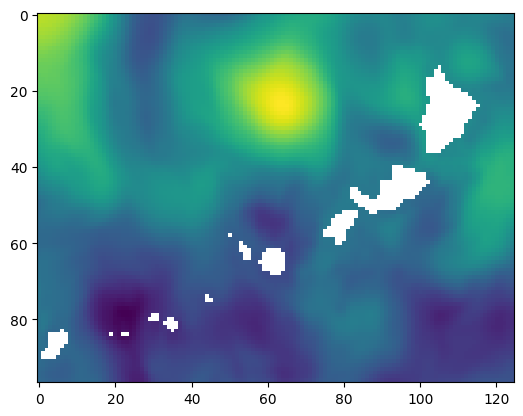

In [14]:
plt.imshow(ssh)

In [2]:
import tkinter as tk
import time

class Counter:
    def __init__(self, name):
        self.name = name
        self.start_time = None
        self.elapsed_time = 0
        self.running = False
    
    def start(self):
        if not self.running:
            self.start_time = time.time()
            self.running = True
    
    def stop(self):
        if self.running:
            self.elapsed_time += time.time() - self.start_time
            self.running = False
    
    def reset(self):
        self.start_time = None
        self.elapsed_time = 0
        self.running = False

class App:
    def __init__(self, master):
        self.master = master
        self.master.title("Counter App")
        self.counters = {}
        
        # Create UI elements
        self.frame = tk.Frame(self.master)
        self.frame.pack()
        
        self.create_counter_button = tk.Button(self.frame, text="Create Counter", command=self.create_counter)
        self.create_counter_button.pack(side=tk.LEFT)
        
        self.start_button = tk.Button(self.frame, text="Start", command=self.start_counters)
        self.start_button.pack(side=tk.LEFT)
        
        self.stop_button = tk.Button(self.frame, text="Stop", command=self.stop_counters)
        self.stop_button.pack(side=tk.LEFT)
        
        self.reset_button = tk.Button(self.frame, text="Reset", command=self.reset_counters)
        self.reset_button.pack(side=tk.LEFT)
        
        self.quit_button = tk.Button(self.frame, text="Quit", command=self.master.quit)
        self.quit_button.pack(side=tk.LEFT)
    
    def create_counter(self):
        counter_name = tk.simpledialog.askfloat("New Counter", "Enter a name for the new counter:")
        if counter_name and counter_name not in self.counters:
            self.counters[counter_name] = Counter(counter_name)
    
    def start_counters(self):
        for counter in self.counters.values():
            counter.start()
    
    def stop_counters(self):
        for counter in self.counters.values():
            counter.stop()
    
    def reset_counters(self):
        for counter in self.counters.values():
            counter.reset()
    
    def update_display(self):
        self.master.after(1000, self.update_display)  # update every 1 second
        for name, counter in self.counters.items():
            elapsed_time = counter.elapsed_time
            if counter.running:
                elapsed_time += time.time() - counter.start_time
            print(f"{name}: {elapsed_time:.2f} seconds")  # replace this with your own display code

if __name__ == "__main__":
    root = tk.Tk()
    app = App(root)
    app.update_display()
    root.mainloop()

ModuleNotFoundError: No module named '_tkinter'

In [4]:
import tkinter as tk

ModuleNotFoundError: No module named '_tkinter'

In [ ]:
tk.